# Comparison of Recommendation Systems: User-User vs. ALS

## Introduction

This report presents a comparative analysis of two recommendation system algorithms: User-User Collaborative Filtering and Alternating Least Squares (ALS). We aim to explore their performance differences, challenges, and discuss the potential reasons behind the observed results.

## Recommendation System Methods

### User-User Collaborative Filtering

User-User Collaborative Filtering is based on the similarity between users. The algorithm predicts a user's interest in an item based on ratings from similar users. This method's challenge includes scalability and sparsity of user-item interactions.

### Alternating Least Squares (ALS)

ALS is a matrix factorization technique used in collaborative filtering. Unlike User-User Collaborative Filtering, ALS deals with the scalability and sparsity more efficiently by alternating between fixing user features to solve for item features and vice versa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

In [2]:
rmse_user_user=3.768549879531389
rmse_als = 4.5155765942672295

In [3]:
print(f"User-User RMSE: {rmse_user_user}")
print(f"ALS RMSE: {rmse_als}")

User-User RMSE: 3.768549879531389
ALS RMSE: 4.5155765942672295


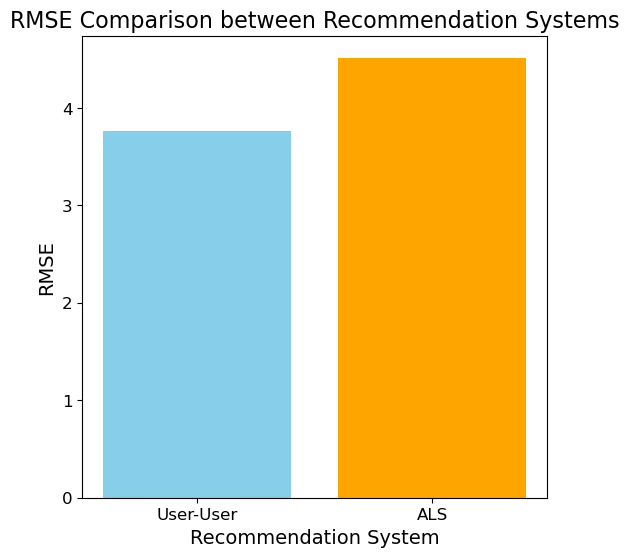

In [4]:
labels = ['User-User', 'ALS']
rmse_values = [rmse_user_user, rmse_als]

plt.figure(figsize=(6, 6))
plt.bar(labels, rmse_values, color=['skyblue', 'orange'])
plt.xlabel('Recommendation System', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('RMSE Comparison between Recommendation Systems', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Analysis of Results

The RMSE comparison reveals that the User-User Collaborative Filtering method achieved a better (lower) RMSE score compared to the ALS method in our dataset. This outcome is intriguing as ALS is generally more resilient to the scalability and sparsity issues that often challenge traditional collaborative filtering methods.




## Collaborative filtering challenges
### Memory consumption
One of the fundamental challenges in implementing Collaborative Filtering (CF), particularly the User-User method, is the computational and memory overhead associated with the user-item interaction matrix.
- **Core of algorithm**: This matrix forms the core of the Collaborative Filtering algorithm, capturing the relationships between users and items based on their interactions, such as ratings or views. However, its computation and storage pose significant challenges: 
    * Sparse Nature of the Matrix
    * Scalability Concerns

## Alternatives
### Sparse Matrix Representations
Utilizing data structures that efficiently represent sparse matrices can drastically reduce memory requirements. Libraries like SciPy in Python offer sparse matrix implementations that store only non-zero elements.
### Distributed Computing
Frameworks like Apache Spark allow for distributed computing, enabling the processing of large-scale data across multiple machines. This approach can mitigate memory constraints inherent to single-machine setups.

## Impact of Dataset Characteristics on Recommendation System Performance

When evaluating recommendation systems, particularly comparing **Collaborative Filtering (CF)** to **Alternating Least Squares (ALS)** through metrics like **RMSE (Root Mean Square Error)**, it's crucial to consider how dataset characteristics influence these metrics. A smaller or more uniform dataset can make CF appear more effective, potentially skewing comparison results.

### Dataset Size and Homogeneity

- **Smaller Datasets:** CF can perform exceptionally well on smaller, less diverse datasets because it can easily capture the prevalent user-item interaction patterns. This close fit results in a lower RMSE, indicating high accuracy. However, this might not translate to better performance on more diverse, real-world datasets.

- **Homogeneity:** If a dataset primarily consists of similar types of users or items, CF's ability to predict based on user-user similarities becomes more straightforward, enhancing its performance metrics.

### Skewness Towards Specific Ratings

- **Rating Concentration:** Many datasets exhibit a skewness towards certain ratings (e.g., users predominantly rating items they like). This concentration can lead to overfitting in CF, where the system becomes highly accurate for the dominant trends but less so for outlier preferences or less common interactions.

- **Impact on Variance:** A dataset skewed towards specific ratings types results in lower variance among user ratings. CF can exploit this to achieve lower RMSE by aligning closely with the average trend, which may not accurately reflect its ability to recommend items personalized to diverse user tastes.

### Comparison with ALS

- **Latent Factors in ALS:** Unlike CF, ALS aims to uncover latent factors that might not be immediately apparent from the user-item interactions. This approach is inherently suited for larger, more complex datasets, where the goal is to generalize well across a broad range of preferences.

- **Performance in Skewed Datasets:** In a skewed or smaller dataset, the complex model of ALS might not show a significant advantage over CF, as measured by RMSE. This doesn't necessarily indicate inferior performance but rather reflects ALS's design to capture deeper, more nuanced patterns that require larger datasets to manifest.

### Metric Interpretation

A lower RMSE for CF under certain dataset conditions highlights the need for careful consideration of dataset diversity, size, and rating distribution when comparing recommendation systems. It emphasizes that:

- **CF's Lower RMSE** might not always signify superior recommendation quality, especially in scenarios where dataset characteristics favor CF's mechanism.
- **ALS's Strengths** become more apparent in diverse and large-scale environments, where understanding complex user preferences is crucial.


## Conclusion

Our comparative analysis highlights the importance of considering dataset characteristics and algorithmic challenges when choosing a recommendation system. While User-User Collaborative Filtering performed better in terms of RMSE in this study, the ALS method's scalability and efficiency advantages make it a valuable alternative for larger-scale applications. Future investigations could explore parameter tuning for ALS and hybrid approaches to leverage the strengths of both methods.